# Analysis of Pipeline Accidents in the US between 2013 to 2016

<b>Datasource and description</b> : https://www.kaggle.com/usdot/pipeline-accidents


## The Data Science Process

The following analysis will follow thje CrossIndustry Process for data m,ining (CRISPDM) pipeline. <br>
The 6 majopr phases are

1. Business understanding
2. Data Understanding
3. Data Preparation
4. Data Modelling
5. Results and Evaluation 
6. Deployment 



## 1.Business Understanding

This analysis is set to answer the following questions:
- What is the major cause of pipeline accidents?
- What time of the year is pipeline accidents common? (Time Series Analysis)
- What locations do pipeline accidents mostly occur?
<!-- - What company (oil operators) most frequently has accidents and what is the reason?
- What type of liquids are usually involved in accidents and cost more on average?
- What factors are related to the quantity of barrel lost and the total amount expended?
 -->

##  2. Data Understanding and Preprocessing

Now, we need to understand the data necessary to answer the above questions, and pull out accordingly. We shall then wrangle


In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt
pd. set_option("display.max_columns", None)

#import warnings
#warnings.filterwarnings('ignore')



#plt.style.use('ggplot')
#import plotly.graph_objects as go

In [266]:
df = pd.read_csv('./database.csv')
df.head(4)

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540


In [267]:
df.shape

(2795, 48)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 11  Liquid Name      

#### Renaming the columns

to remove whitespaces brackets and slashes

In [269]:
all_col = list(df.columns)
for i in range(len(all_col)):
    all_col[i] = all_col[i].replace(' ', '_')
    all_col[i] = all_col[i].replace('/', '_')
    all_col[i] = all_col[i].replace('(', '')
    all_col[i] = all_col[i].replace(')', '')
    
    
df.columns = all_col

df.head()

,Report_Number,Supplemental_Number,Accident_Year,Accident_Date_Time,Operator_ID,Operator_Name,Pipeline_Facility_Name,Pipeline_Location,Pipeline_Type,Liquid_Type,Liquid_Subtype,Liquid_Name,Accident_City,Accident_County,Accident_State,Accident_Latitude,Accident_Longitude,Cause_Category,Cause_Subcategory,Unintentional_Release_Barrels,Intentional_Release_Barrels,Liquid_Recovery_Barrels,Net_Loss_Barrels,Liquid_Ignition,Liquid_Explosion,Pipeline_Shutdown,Shutdown_Date_Time,Restart_Date_Time,Public_Evacuations,Operator_Employee_Injuries,Operator_Contractor_Injuries,Emergency_Responder_Injuries,Other_Injuries,Public_Injuries,All_Injuries,Operator_Employee_Fatalities,Operator_Contractor_Fatalities,Emergency_Responder_Fatalities,Other_Fatalities,Public_Fatalities,All_Fatalities,Property_Damage_Costs,Lost_Commodity_Costs,Public_Private_Property_Damage_Costs,Emergency_Response_Costs,Environmental_Remediation_Costs,Other_Costs,All_Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,TX,33.58266,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


#### Treating Duplicates

In [270]:
#Checking for duplicates in the data using the unique ID

print("The number of records in the df is {}".format(df.shape[0]))
print()
print("No of unique records in the df (given by report_number) is {}".format(df['Report_Number'].
                                                                                nunique()))

The number of records in the df is 2795

No of unique records in the df (given by report_number) is 2795


There are no duplicates.


In [271]:
#Removing duplicates

#df= df[~df.duplicated()]
#df.shape

#### Finding missing values
We shall be removing columns with an average of 60percent missing values

In [272]:
major_missing = df.columns[df.isnull().mean() > 0.60]
print(major_missing)
to_remove =list(major_missing)

Index(['Liquid_Name', 'Operator_Employee_Injuries',
       'Operator_Contractor_Injuries', 'Emergency_Responder_Injuries',
       'Other_Injuries', 'Public_Injuries', 'All_Injuries',
       'Operator_Employee_Fatalities', 'Operator_Contractor_Fatalities',
       'Emergency_Responder_Fatalities', 'Other_Fatalities',
       'Public_Fatalities', 'All_Fatalities'],
      dtype='object')


In [273]:
(df.isnull().mean())*100

#multiplied by 100 to get answer in percent

Report_Number                            0.000000
Supplemental_Number                      0.000000
Accident_Year                            0.000000
Accident_Date_Time                       0.000000
Operator_ID                              0.000000
Operator_Name                            0.000000
Pipeline_Facility_Name                   4.329159
Pipeline_Location                        0.000000
Pipeline_Type                            0.644007
Liquid_Type                              0.000000
Liquid_Subtype                          51.735242
Liquid_Name                             92.057245
Accident_City                           11.270125
Accident_County                          2.683363
Accident_State                           0.429338
Accident_Latitude                        0.000000
Accident_Longitude                       0.000000
Cause_Category                           0.000000
Cause_Subcategory                        0.000000
Unintentional_Release_Barrels            0.000000


Columns with more than 50% missing data will be dropped. The number of records available is already small, we cannot afford to treat more than 40percent missing values.


In [274]:
missing_data = df.isnull().mean()

to_drop_list = list(missing_data[missing_data > 0.60].index)

print(to_drop_list)

['Liquid_Name', 'Operator_Employee_Injuries', 'Operator_Contractor_Injuries', 'Emergency_Responder_Injuries', 'Other_Injuries', 'Public_Injuries', 'All_Injuries', 'Operator_Employee_Fatalities', 'Operator_Contractor_Fatalities', 'Emergency_Responder_Fatalities', 'Other_Fatalities', 'Public_Fatalities', 'All_Fatalities']


In [275]:
df.head(2)

,Report_Number,Supplemental_Number,Accident_Year,Accident_Date_Time,Operator_ID,Operator_Name,Pipeline_Facility_Name,Pipeline_Location,Pipeline_Type,Liquid_Type,Liquid_Subtype,Liquid_Name,Accident_City,Accident_County,Accident_State,Accident_Latitude,Accident_Longitude,Cause_Category,Cause_Subcategory,Unintentional_Release_Barrels,Intentional_Release_Barrels,Liquid_Recovery_Barrels,Net_Loss_Barrels,Liquid_Ignition,Liquid_Explosion,Pipeline_Shutdown,Shutdown_Date_Time,Restart_Date_Time,Public_Evacuations,Operator_Employee_Injuries,Operator_Contractor_Injuries,Emergency_Responder_Injuries,Other_Injuries,Public_Injuries,All_Injuries,Operator_Employee_Fatalities,Operator_Contractor_Fatalities,Emergency_Responder_Fatalities,Other_Fatalities,Public_Fatalities,All_Fatalities,Property_Damage_Costs,Lost_Commodity_Costs,Public_Private_Property_Damage_Costs,Emergency_Response_Costs,Environmental_Remediation_Costs,Other_Costs,All_Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008


In [276]:
df.drop(to_drop_list, axis=1 ,inplace=True)

In [277]:
df.shape
 

(2795, 35)

In [278]:
(df.isnull().mean())*100

Report_Number                            0.000000
Supplemental_Number                      0.000000
Accident_Year                            0.000000
Accident_Date_Time                       0.000000
Operator_ID                              0.000000
Operator_Name                            0.000000
Pipeline_Facility_Name                   4.329159
Pipeline_Location                        0.000000
Pipeline_Type                            0.644007
Liquid_Type                              0.000000
Liquid_Subtype                          51.735242
Accident_City                           11.270125
Accident_County                          2.683363
Accident_State                           0.429338
Accident_Latitude                        0.000000
Accident_Longitude                       0.000000
Cause_Category                           0.000000
Cause_Subcategory                        0.000000
Unintentional_Release_Barrels            0.000000
Intentional_Release_Barrels             56.744186


In [279]:
df.dtypes

Report_Number                             int64
Supplemental_Number                       int64
Accident_Year                             int64
Accident_Date_Time                       object
Operator_ID                               int64
Operator_Name                            object
Pipeline_Facility_Name                   object
Pipeline_Location                        object
Pipeline_Type                            object
Liquid_Type                              object
Liquid_Subtype                           object
Accident_City                            object
Accident_County                          object
Accident_State                           object
Accident_Latitude                       float64
Accident_Longitude                      float64
Cause_Category                           object
Cause_Subcategory                        object
Unintentional_Release_Barrels           float64
Intentional_Release_Barrels             float64
Liquid_Recovery_Barrels                 

In [280]:
df.describe()

,Report_Number,Supplemental_Number,Accident_Year,Operator_ID,Accident_Latitude,Accident_Longitude,Unintentional_Release_Barrels,Intentional_Release_Barrels,Liquid_Recovery_Barrels,Net_Loss_Barrels,Public_Evacuations,Property_Damage_Costs,Lost_Commodity_Costs,Public_Private_Property_Damage_Costs,Emergency_Response_Costs,Environmental_Remediation_Costs,Other_Costs,All_Costs
count,2.795000e+03,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,1209.000000,2795.000000,2795.000000,2338.000000,2.788000e+03,2.791000e+03,2.785000e+03,2.789000e+03,2.787000e+03,2.779000e+03,2.795000e+03
mean,2.013293e+07,19433.319499,2013.187835,21388.476565,35.781608,-95.682691,207.245843,238.533623,75.051792,132.194050,0.964072,1.122963e+05,9.805299e+03,2.512195e+04,2.918911e+05,3.628094e+05,3.435604e+04,8.340332e+05
std,1.982098e+04,1724.815370,1.972102,12430.973428,5.652599,12.328430,1368.667813,2781.771453,546.188247,1185.019252,18.151398,8.709947e+05,6.384075e+04,5.243581e+05,4.617076e+06,1.206887e+07,6.191235e+05,1.657830e+07
min,2.010000e+07,15072.000000,2010.000000,300.000000,18.448010,-158.099930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.012004e+07,17978.500000,2012.000000,11169.000000,30.909375,-100.587636,0.480000,0.000000,0.000000,0.000000,0.000000,1.000000e+02,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.039500e+03
50%,2.013037e+07,19502.000000,2013.000000,26041.000000,34.925440,-95.488870,2.000000,0.000000,0.740000,0.000000,0.000000,3.000000e+03,1.000000e+02,0.000000e+00,2.520000e+03,8.000000e+02,0.000000e+00,2.312900e+04
75%,2.015023e+07,20996.500000,2015.000000,31618.000000,40.264062,-91.089463,20.000000,0.000000,8.000000,2.000000,0.000000,2.500000e+04,7.000000e+02,0.000000e+00,1.550000e+04,1.500000e+04,0.000000e+00,1.172325e+05
max,2.017003e+07,22049.000000,2017.000000,99043.000000,70.261265,104.263399,30565.000000,70191.000000,18245.000000,30565.000000,700.000000,2.700000e+07,1.417839e+06,2.300000e+07,1.770000e+08,6.350000e+08,2.235000e+07,8.405261e+08


## Treating missing data
We still have to treat misssing data for about 12 columns. 

Pipeline_Facility_Name                  4.32
Pipeline_Type                           0.64
Accident_City                           11.270125
Accident_County                          2.683363
Accident_State 
Pipeline_Shutdown                        7.584973
Public_Evacuations                      16.350626
Property_Damage_Costs                    0.250447
Lost_Commodity_Costs                     0.143113
Public_Private_Property_Damage_Costs     0.357782
Emergency_Response_Costs                 0.214669
Environmental_Remediation_Costs          0.286225
Other_Costs            




NB: In this analysis, we will deal with only total cost. so therefore, we will remove every other columns that has to do with costs.

For numeric col, we shall fill with mean or median.
 - Skewed column, fill with median as mean is not robust to outliers
 - Symmetric column, fill with mean.

For categorical column fill with mode
 DIY,,fill categorical column based on the category of other column. e.g Cushing in Oklahoma and not Texas.

In [281]:
cat_list = ["Pipeline_Facility_Name", "Pipeline_Type", "Accident_City", "Accident_County", "Accident_State",
            "Pipeline_Shutdown"]



skewed_list = []
symmetric_list = []



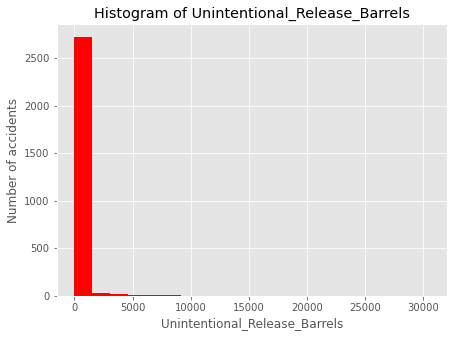

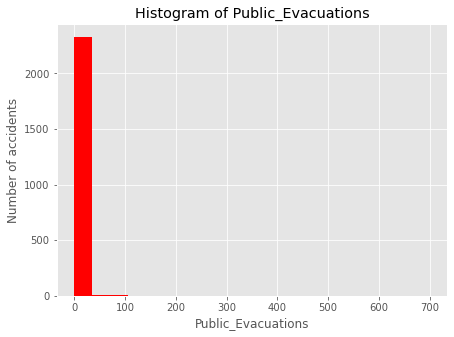

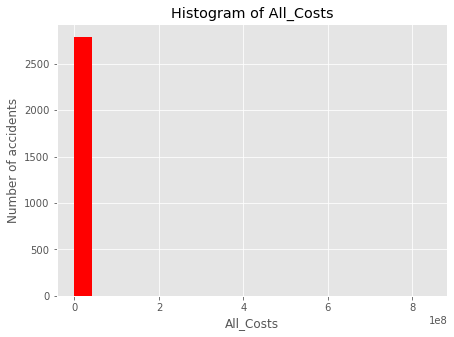

In [282]:

num_lista = ['Unintentional_Release_Barrels', 'Public_Evacuations','All_Costs']

def histogram_plot(df, num_cols, bins = 20):
    '''Distribution plot to find out skewed n symmetric columns'''
    for num_col in num_cols:
        fig = plt.figure(figsize=(7,5)) # define plot area
        ax = fig.gca() # define axis    
        df[num_col].plot.hist(ax = ax, bins = bins, color='r') # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + num_col) # Give the plot a main title
        ax.set_xlabel(num_col) # Set text for the x axis
        ax.set_ylabel('Number of accidents')# Set text for y axis
        plt.show()
        
        
histogram_plot(df, num_cols=num_lista)
 
    

These three columns are all right skewed. It is better to fill with median.

In [283]:
num_list =['Public_Evacuations', 'Property_Damage_Costs','Lost_Commodity_Costs', 'Emergency_Response_Costs',
 'Environmental_Remediation_Costs', 'Other_Costs', 'Public_Private_Property_Damage_Costs']

In [284]:
for i in cat_list:
    df[i].fillna(str(df[i].mode().iloc[0]), inplace=True)
    
for j in num_list:
    df[j].fillna(df[j].median(), inplace=True)
        
    

In [285]:
(df.isnull().mean())*100

Report_Number                            0.000000
Supplemental_Number                      0.000000
Accident_Year                            0.000000
Accident_Date_Time                       0.000000
Operator_ID                              0.000000
Operator_Name                            0.000000
Pipeline_Facility_Name                   0.000000
Pipeline_Location                        0.000000
Pipeline_Type                            0.000000
Liquid_Type                              0.000000
Liquid_Subtype                          51.735242
Accident_City                            0.000000
Accident_County                          0.000000
Accident_State                           0.000000
Accident_Latitude                        0.000000
Accident_Longitude                       0.000000
Cause_Category                           0.000000
Cause_Subcategory                        0.000000
Unintentional_Release_Barrels            0.000000
Intentional_Release_Barrels             56.744186


In [286]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Report_Number,20100016,20100254,20100038,20100260,20100030,20100021,20110036,20100255,20100261,20100024,20100150,20100262,20100234,20100026,20100106,20100082,20100037,20100025,20110071,20100100
Supplemental_Number,17305,17331,17747,18574,16276,17161,18052,18584,18050,18390,15205,15399,18134,17874,17751,17824,18592,17505,18051,17975
Accident_Year,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010
Accident_Date_Time,1/1/2010 7:15 AM,1/4/2010 8:30 AM,1/5/2010 10:30 AM,1/6/2010 7:30 PM,1/7/2010 1:00 PM,1/8/2010 11:38 PM,1/9/2010 12:15 AM,1/9/2010 1:12 AM,1/10/2010 7:46 PM,1/11/2010 2:30 PM,1/11/2010 2:30 PM,1/11/2010 2:47 PM,1/11/2010 3:00 PM,1/11/2010 11:00 PM,1/12/2010 10:25 AM,1/12/2010 2:30 PM,1/12/2010 7:08 PM,1/13/2010 7:36 AM,1/13/2010 1:30 PM,1/13/2010 3:30 PM
Operator_ID,32109,15786,20160,11169,300,11169,26041,12624,26041,31684,32296,31454,9175,31684,26085,32080,12105,31174,26041,22855
Operator_Name,ONEOK NGL PIPELINE LP,PORTLAND PIPELINE CORP,"PETROLOGISTICS OLEFINS, LLC","ENBRIDGE ENERGY, LIMITED PARTNERSHIP","PLAINS PIPELINE, L.P.","ENBRIDGE ENERGY, LIMITED PARTNERSHIP","KINDER MORGAN LIQUID TERMINALS, LLC",MOBIL CORP,"KINDER MORGAN LIQUID TERMINALS, LLC",CONOCOPHILLIPS,TARGA RESOURCES OPERATING LP,"NUSTAR LOGISTICS, L.P.",JAYHAWK PIPELINE LLC,CONOCOPHILLIPS,"PLAINS MARKETING, L.P.","CCPS TRANSPORTATION, LLC","MAGELLAN AMMONIA PIPELINE, L.P.","SHELL PIPELINE CO., L.P.","KINDER MORGAN LIQUID TERMINALS, LLC","KOCH PIPELINE COMPANY, L.P."
Pipeline_Facility_Name,KINDER MORGAN JCT,24-INCH MAIN LINE,WYOMING PIPELINE COMPANY,SUPERIOR TERMINAL,RED RIVER EAST,WYOMING PIPELINE COMPANY,WYOMING PIPELINE COMPANY,HULL STATION,WYOMING PIPELINE COMPANY,TANK 1501,N-4 LINE (NORMAL BUTANE),"46P HOUSTON 12"" REFINDED PRODUCTS PL",CHASE KAW TERMINAL,TANK 824,CUSHING TERMINAL,"CCPS TRANSPORTATION, RUSH STATION","MAGELLAN AMMONIA PIPELINE, LP",SORRENTO DOME,WYOMING PIPELINE COMPANY,PARK RAPIDS PUMP STATION
Pipeline_Location,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE
Pipeline_Type,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,UNDERGROUND,UNDERGROUND,UNDERGROUND,TANK,ABOVEGROUND,ABOVEGROUND,TANK,UNDERGROUND,UNDERGROUND,UNDERGROUND,TANK,ABOVEGROUND,ABOVEGROUND,UNDERGROUND,ABOVEGROUND,TANK,ABOVEGROUND
Liquid_Type,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,CRUDE OIL,CRUDE OIL,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",CRUDE OIL,CRUDE OIL,CRUDE OIL,CRUDE OIL,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",CRUDE OIL


In [287]:
df.dtypes

Report_Number                             int64
Supplemental_Number                       int64
Accident_Year                             int64
Accident_Date_Time                       object
Operator_ID                               int64
Operator_Name                            object
Pipeline_Facility_Name                   object
Pipeline_Location                        object
Pipeline_Type                            object
Liquid_Type                              object
Liquid_Subtype                           object
Accident_City                            object
Accident_County                          object
Accident_State                           object
Accident_Latitude                       float64
Accident_Longitude                      float64
Cause_Category                           object
Cause_Subcategory                        object
Unintentional_Release_Barrels           float64
Intentional_Release_Barrels             float64
Liquid_Recovery_Barrels                 

#### Working with Time and Date Features

In [288]:
#Converting the accidentdatetime from object to datetime to make it easy to work with
df['Accident_Date_Time'] = pd.to_datetime(df['Accident_Date_Time'])

In [289]:
df.dtypes

Report_Number                                    int64
Supplemental_Number                              int64
Accident_Year                                    int64
Accident_Date_Time                      datetime64[ns]
Operator_ID                                      int64
Operator_Name                                   object
Pipeline_Facility_Name                          object
Pipeline_Location                               object
Pipeline_Type                                   object
Liquid_Type                                     object
Liquid_Subtype                                  object
Accident_City                                   object
Accident_County                                 object
Accident_State                                  object
Accident_Latitude                              float64
Accident_Longitude                             float64
Cause_Category                                  object
Cause_Subcategory                               object
Unintentio

In [290]:
#To disintegrate the datetime column into year, month, dateofmonth, dayof week, and hour for easy analysis

#df['Year'] = df['Accident_Date_Time'].dt.year

df['Month'] = df['Accident_Date_Time'].dt.month

df['Day'] = df['Accident_Date_Time'].dt.day

df['Hour'] = df['Accident_Date_Time'].dt.hour

df['Weekday'] = df['Accident_Date_Time'].dt.weekday

In [291]:
df.head(1).T

,0
Report_Number,20100016
Supplemental_Number,17305
Accident_Year,2010
Accident_Date_Time,2010-01-01 07:15:00
Operator_ID,32109
Operator_Name,ONEOK NGL PIPELINE LP
Pipeline_Facility_Name,KINDER MORGAN JCT
Pipeline_Location,ONSHORE
Pipeline_Type,ABOVEGROUND
Liquid_Type,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS"


We see that the day of week is represented in digit. Let us convert to strings. 


In [292]:
day_map = {0:'Mon',1:'Tue', 2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['Weekday'] = df['Weekday'].map(day_map)

In [293]:
df.columns

Index(['Report_Number', 'Supplemental_Number', 'Accident_Year',
       'Accident_Date_Time', 'Operator_ID', 'Operator_Name',
       'Pipeline_Facility_Name', 'Pipeline_Location', 'Pipeline_Type',
       'Liquid_Type', 'Liquid_Subtype', 'Accident_City', 'Accident_County',
       'Accident_State', 'Accident_Latitude', 'Accident_Longitude',
       'Cause_Category', 'Cause_Subcategory', 'Unintentional_Release_Barrels',
       'Intentional_Release_Barrels', 'Liquid_Recovery_Barrels',
       'Net_Loss_Barrels', 'Liquid_Ignition', 'Liquid_Explosion',
       'Pipeline_Shutdown', 'Shutdown_Date_Time', 'Restart_Date_Time',
       'Public_Evacuations', 'Property_Damage_Costs', 'Lost_Commodity_Costs',
       'Public_Private_Property_Damage_Costs', 'Emergency_Response_Costs',
       'Environmental_Remediation_Costs', 'Other_Costs', 'All_Costs', 'Month',
       'Day', 'Hour', 'Weekday'],
      dtype='object')

In [294]:
# month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June', 7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

# df['Month'] = df['Month'].map(month_map)

In [295]:
df.head(1)

,Report_Number,Supplemental_Number,Accident_Year,Accident_Date_Time,Operator_ID,Operator_Name,Pipeline_Facility_Name,Pipeline_Location,Pipeline_Type,Liquid_Type,Liquid_Subtype,Accident_City,Accident_County,Accident_State,Accident_Latitude,Accident_Longitude,Cause_Category,Cause_Subcategory,Unintentional_Release_Barrels,Intentional_Release_Barrels,Liquid_Recovery_Barrels,Net_Loss_Barrels,Liquid_Ignition,Liquid_Explosion,Pipeline_Shutdown,Shutdown_Date_Time,Restart_Date_Time,Public_Evacuations,Property_Damage_Costs,Lost_Commodity_Costs,Public_Private_Property_Damage_Costs,Emergency_Response_Costs,Environmental_Remediation_Costs,Other_Costs,All_Costs,Month,Day,Hour,Weekday
0,20100016,17305,2010,2010-01-01 07:15:00,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,MCPHERSON,MCPHERSON,KS,38.6707,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.0,0.1,0.0,21.0,NO,NO,NO,NaN,NaN,0.0,110.0,1517.0,0.0,0.0,0.0,0.0,1627,1,1,7,Fri


In [296]:
#To confirm if the two columns showing the accident year are equivalent, as expected

df["Accident_Year"].isin(df.Accident_Year).all()

True

### 1. Time Series Analysis

##### When did most accidents occur?

In [297]:
def trends(df, datecol, color):
    df2 = df.groupby(datecol).count()
    df2.head(13)

    plt.figure(figsize = (6,4))
    plt.plot(df2.index, df2["Report_Number"], marker='o', color=color)
    plt.title('Count of Accident distribution for each '+ datecol, fontsize=11)
    plt.xlabel(datecol, fontsize=11)
    plt.ylabel('count', fontsize=11)
    plt.grid(True)
    plt.show()

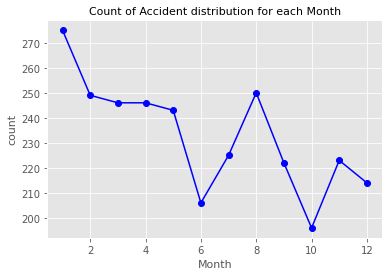

In [298]:
#MONTHLY DISTRIBUTION
trends(df, 'Month','b' )

Most accidents occur in January, and dips for the rest of the year, except in August, where there is a second high. October and June have the least occurence of accident in the period 2010 to 2017.


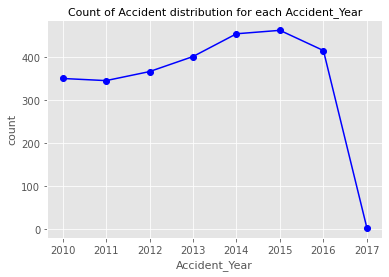

In [299]:
#YEARLY TREND
trends(df, 'Accident_Year','b' )

This plot is deceiving. Because 2017 data was last collected, it appears the data for 2017 is not available for the whole year, hence the sharp decline. Let us confirm this

In [300]:
subdf2017= df[df['Accident_Year']==2017]
subdf2017.shape

#Alternatively,
#df2 = df.groupby('Accident_Year').count()

(2, 39)

Alas, there are only two rows for the year 2017. We should remove all observations that pertains to 2017 so as to avoid it skewing our results

In [301]:
df.drop(df[df['Accident_Year'] >=2017].index, axis=0, inplace = True)

In [302]:
df.tail(1)

,Report_Number,Supplemental_Number,Accident_Year,Accident_Date_Time,Operator_ID,Operator_Name,Pipeline_Facility_Name,Pipeline_Location,Pipeline_Type,Liquid_Type,Liquid_Subtype,Accident_City,Accident_County,Accident_State,Accident_Latitude,Accident_Longitude,Cause_Category,Cause_Subcategory,Unintentional_Release_Barrels,Intentional_Release_Barrels,Liquid_Recovery_Barrels,Net_Loss_Barrels,Liquid_Ignition,Liquid_Explosion,Pipeline_Shutdown,Shutdown_Date_Time,Restart_Date_Time,Public_Evacuations,Property_Damage_Costs,Lost_Commodity_Costs,Public_Private_Property_Damage_Costs,Emergency_Response_Costs,Environmental_Remediation_Costs,Other_Costs,All_Costs,Month,Day,Hour,Weekday
2792,20170027,22045,2016,2016-12-29 06:40:00,39145,ENBRIDGE STORAGE (CUSHING) L.L.C.,CUSHING CENTRAL TERMINAL,ONSHORE,TANK,CRUDE OIL,NaN,CUSHING,PAYNE,OK,35.565292,-96.454956,MATERIAL/WELD/EQUIP FAILURE,OTHER EQUIPMENT FAILURE,1.0,NaN,1.0,0.0,NO,NO,NO,NaN,NaN,0.0,7000.0,50.0,0.0,5000.0,3000.0,0.0,15050,12,29,6,Thu


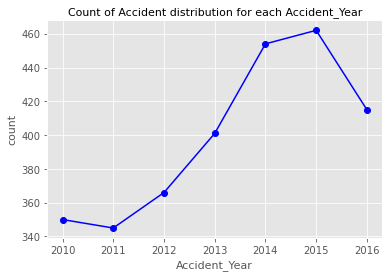

In [303]:
#YEARLY TREND
trends(df, 'Accident_Year','b' )

There has been an uptrend in the number of occurence of pipeline accidents over the last 6 years. It dipped in 2016, However, we will need data for subsequent years to see whether the dip in 2016 is a trend or just a one-case. 
In this period being studied, 460 is the highest no of times an accident has occured in a year. This occured in 2015. The least cases of accoident was recorded in 2011. All accident that occured in the US has never gone below 350 cases in a year.

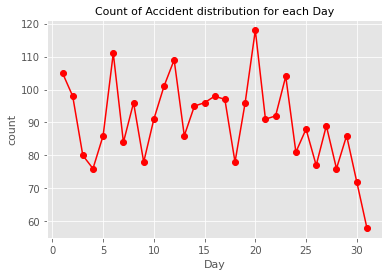

In [304]:
#DAILY TREND
    
trends(df, 'Day','r' )

Anything to see from the daily plot?
Accidents occur least in the last few days of the month. Or we might as well notice that the dip is because not all months of the year has 31 days.

### 2. Where do these pipeline accident occur?

Most of the accidents that happened were concentrated at a particular region, with a few scattered around the other parts of the US. 

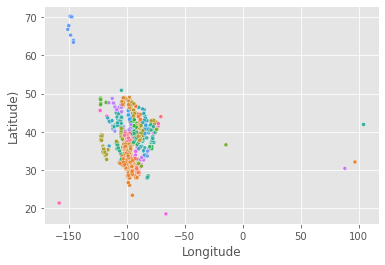

In [305]:
#Altrnatively
#Map of accidents
sns.scatterplot(x= 'Accident_Longitude', y='Accident_Latitude', data=df, hue='Accident_State',s=15, legend=False)
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

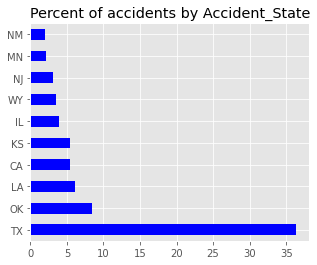

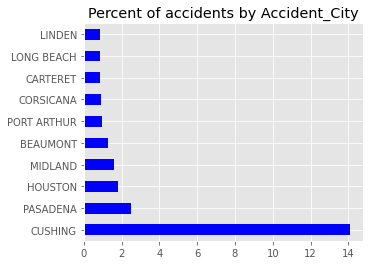

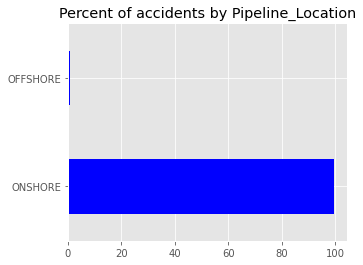

In [306]:
#DISTRIBUTION PLOTS FOR CATEGORICAL COLUMNS related to location



def distrib_plot(df, cat_cols):
    '''#function to plot distribution plot(bar) of the first 10 categories in a list of categorical columns'''
    for cat_col in cat_cols:
        plt.figure(figsize = (5,4))
        first_te= df[cat_col].value_counts(ascending=False, normalize=True)*100
        first_ten = first_te.head(10)
        first_ten.plot(kind='barh',color='b')
        plt.title("Percent of accidents by " +cat_col)
        #plt.savefig('city.png')
        
        
location_cols = ["Accident_State","Accident_City","Pipeline_Location"]       
distrib_plot(df, location_cols )
 
    
    
    
#Alternatively        
# '''

# def plot_bars(auto_prices, cols):
#     for col in cols:
#         fig = plt.figure(figsize=(6,6)) # define plot area
#         ax = fig.gca() # define axis    
#         counts = auto_prices[col].value_counts() # find the counts for each unique category
#         counts.plot.bar(ax = ax, color = 'r') # Use the plot.bar method on the counts data frame
#         ax.set_title('Number of autos by' + col) # Give the plot a main title
#         ax.set_xlabel(col) # Set text for the x axis
#         ax.set_ylabel('Number of autos')# Set text for y axis
#         plt.show()

# '''   


In [307]:
#TOTAL QUANTITY OF BARRELLS UNINTENTIONALLY RELEASED 
def barrels_lost(cat_cols):
    '''A function to perform groupby on categorical columns based on the quantity of barrel lost.'''
    for cat_col in cat_cols:
        by_barrels = df.groupby([cat_col])["Unintentional_Release_Barrels"].sum()
        print(by_barrels )
        print(   )
        print(   )
       
        
cat_cols = ["Accident_State", "Accident_City"]
barrels_lost(cat_cols)


Accident_State
AK      2902.74
AL     12867.26
AR      9166.61
CA     12407.35
CO      2319.38
CT       600.95
FL      1090.39
GA      3310.02
HI      1317.00
IA      4497.33
ID       265.71
IL     39031.21
IN      5085.67
KS     15261.56
KY       254.11
LA     49121.64
MA        11.20
MD         9.67
ME         0.12
MI     31765.39
MN      6445.49
MO      6919.73
MS       945.79
MT      3019.07
NC       382.76
ND     34503.51
NE      6028.85
NJ      1609.02
NM     11204.73
NV         5.75
NY      4189.63
OH      3155.87
OK     41705.66
OR         4.33
PA      7871.09
PR        66.00
SC     11102.86
SD       937.70
TN        99.13
TX    194072.70
UT      1843.24
VA       150.75
WA        12.36
WI      3432.86
WV     41970.00
WY      6283.74
Name: Unintentional_Release_Barrels, dtype: float64


Accident_City
11.5 MILES NORTH OF MCKITTRICK, CA ON HWY 33      9.29
760 ROOSEVELT AVENUE                             75.08
799 SOUTH SEASIDE AVENUE, TERMINAL ISLAND         1.30
ABERDEEN        

Over 35% of pipeline accidents thsat occured occur in Texas. 
Texas has the most cases and most barrels released in the timeframe being studied.

Amost 100 percent of all accidents are onshore.
Cushing, Oklahoma is the worst hit city with up to 14 percent of all cases recorded here.

In [308]:
#The below steps are in order to embed the next visualisations(map) on Medium blog using Plotly
# To upload the visualization to your plotly account

username='oladipod'
api_key='t1wXAiEJmZB8GazYWO9Z'

chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)


In [309]:
import chart_studio.plotly as py
import chart_studio.tools as tls


In [310]:
plt.style.use('ggplot')
import plotly.graph_objects as go


data_geo = pd.value_counts(df['Accident_State'])


fig = go.Figure(data=go.Choropleth(
    locations=data_geo.index,
    z = data_geo.values.astype(float),
    locationmode = 'USA-states',     
    colorscale = 'YlOrRd',
    colorbar_title = "Total Frequency",
))

fig.update_layout(
    title_text = 'Frequency Distribution of Pipeline Accidents by States (US)',
    geo_scope='usa',
)

fig.show()
# plt.savefig('map.png')


In [311]:

d

NameError: name 'd' is not defined

In [ ]:

#To Push the visualiztion to my account, i.e to host the chart live on Plotly
import chart_studio.plotly as py
py.plot(fig, filename = 'Accidentstate', auto_open=True, encoding='utf-8')

In [ ]:
'''
def hist_plot(df, num_cols):
    #function to plot histograms of the distr of numerical columns
    for num_col in num_cols:
        plt.figure(figsize = (8,7))
        df[cat_col].value_counts().head(10).plot(kind='hist',color='b')
        plt.title("histograsm of" +num_col)
        #plt.savefig('city.png')
        
        
num_cols = ["", "", ""]       
distrib_plot(df, num_cols)

'''
 

### 3. What are the major causes of pipeline accidents?

In [ ]:
distrib_plot(df, ['Cause_Category', 'Cause_Subcategory'] )

Material failure and corrosion accounts for up to 70percent of all accidents. 